In [1]:
(1) age - age in years
(2) sex - (1 = male; 0 = female)
(3) cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease(4)
(4)    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
(5)    chol - serum cholestoral in mg/dl
(6)  serum = LDL + HDL + .2 * triglycerides
(7)    above 200 is cause for concern
(8)  fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
(9)    restecg - resting electrocardiographic results
        
    can ra0: Nothing to note
        1: ST-T Wave abnormalitynge from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
    thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)

SyntaxError: invalid syntax (3441734533.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

import seaborn as sns

df = pd.read_csv("heart-disease.csv")

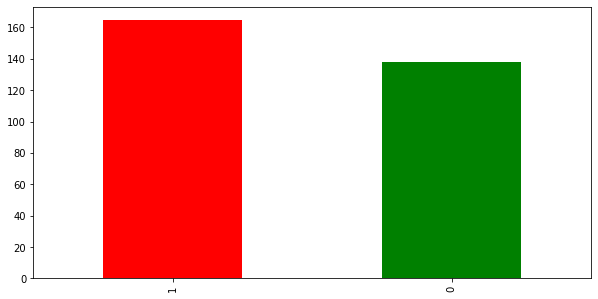

In [3]:
df["target"].value_counts().plot(kind = "bar",color = ["red","green"],figsize=(10,5));

In [4]:
#compare column: target and sex(gender)
# female = 0, male = 1
pd.crosstab(df.target,df.sex)

#according to following result we can say that female has high chance for heart disease as compare to male


sex,0,1
target,,
0,24,114
1,72,93


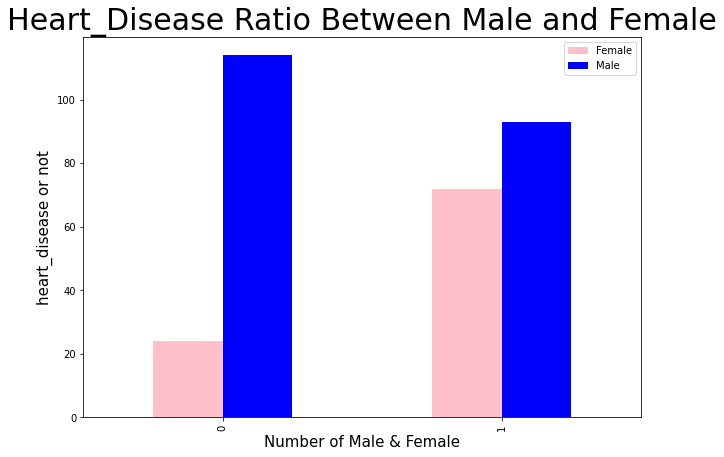

In [5]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color = ["pink",'blue'],figsize = (10,7));
plt.xlabel("Number of Male & Female",fontsize = 15)
plt.ylabel("heart_disease or not",fontsize = 15)
plt.title("Heart_Disease Ratio Between Male and Female",fontsize=30)
plt.legend(["Female","Male"])

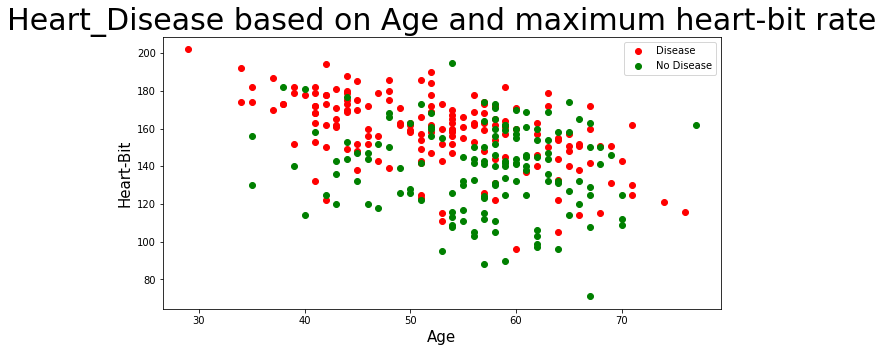

In [6]:
#Compare Age and thalach
plt.figure(figsize=(10,5))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "red");
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           color = "green")
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Heart-Bit",fontsize = 15)
plt.title("Heart_Disease based on Age and maximum heart-bit rate",fontsize=30)
plt.legend(["Disease",'No Disease'])

Predict heart_disease based on chest pain(cp) type

In [7]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


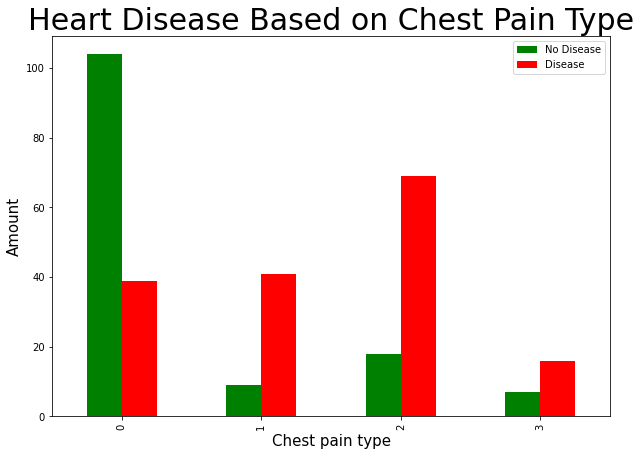

In [8]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",figsize = (10,7),color = ["green","red"]);
plt.xlabel("Chest pain type",fontsize = 15)
plt.ylabel("Amount",fontsize = 15)
plt.title("Heart Disease Based on Chest Pain Type",fontsize = 30)
plt.legend(["No Disease","Disease"]);

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


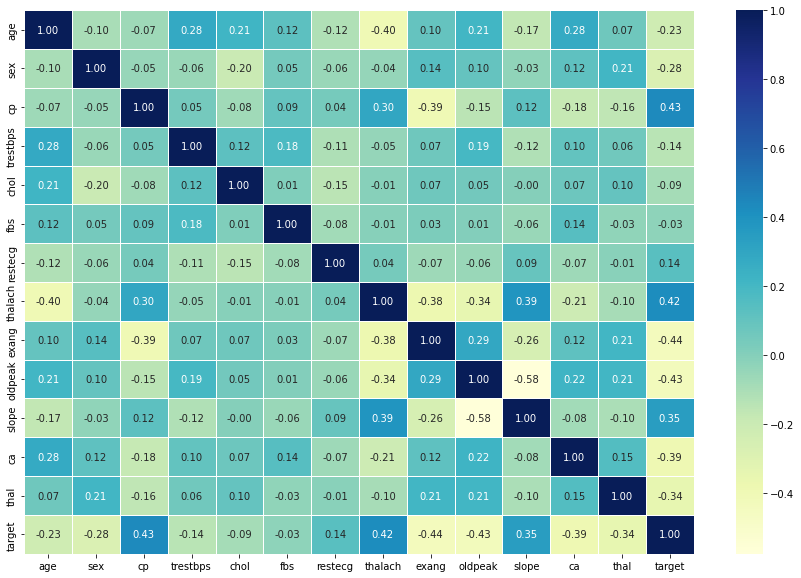

In [10]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

## Modeling



In [11]:
x = df.drop("target",axis = 1)

y = df["target"]

In [12]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
#train test split data
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                test_size = 0.2)

In [15]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3


In [16]:
y_train

108    1
40     1
41     1
162    1
90     1
      ..
192    0
86     1
93     1
207    0
277    0
Name: target, Length: 242, dtype: int64

In [17]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2


In [18]:
y_test

69     1
28     1
112    1
232    0
200    0
      ..
224    0
143    1
220    0
115    1
58     1
Name: target, Length: 61, dtype: int64

In [19]:
models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest Classifier":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    models_score = {}
    for name,model in models.items():
        model.fit(x_train , y_train)
        models_score[name] = model.score(x_test,y_test)
    return models_score
model_score = fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

C:\Users\AMIT JANI\Desktop\ML\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.5245901639344263,
 'Random Forest Classifier': 0.8852459016393442}

<AxesSubplot:>

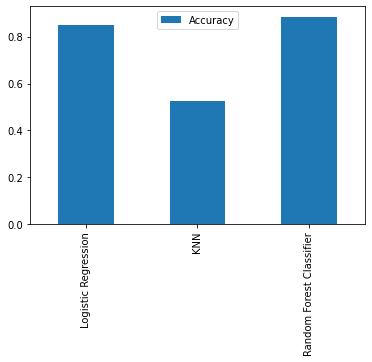

In [20]:
compare_model = pd.DataFrame(model_score,index = ["Accuracy"])
compare_model.T.plot.bar()

In [21]:
test_score = []
train_score = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_score.append(knn.score(x_test,y_test))
    train_score.append(knn.score(x_train,y_train))

Maximum accuracy : 63.93%


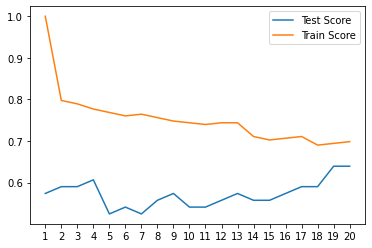

In [22]:
plt.plot(neighbors,test_score,label = "Test Score")
plt.plot(neighbors,train_score,label = "Train Score")
plt.legend()
plt.xticks(np.arange(1,21,1));
print(f"Maximum accuracy : {max(test_score)*100:.2f}%")

In [23]:
test_score

[0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.6065573770491803,
 0.5245901639344263,
 0.5409836065573771,
 0.5245901639344263,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5573770491803278,
 0.5573770491803278,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082]

In [24]:
#create hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}


#Tune Logistic Regression using RandomizeSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 10,
                               verbose = True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [26]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [27]:
#create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

#tune Random Forest Classifier using RandomizedSearchCV
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                           n_jobs = 1,
                          n_iter = 10,
                          verbose = True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [29]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [30]:
model_score

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.5245901639344263,
 'Random Forest Classifier': 0.8852459016393442}

### Tune Logistic Regression using GridSearchCV

In [31]:

log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

### ROC Curve

C:\Users\AMIT JANI\Desktop\ML\sample_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


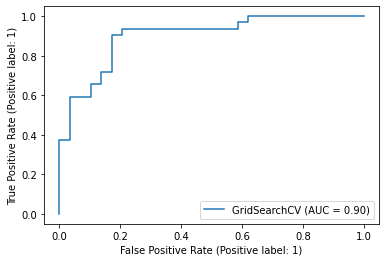

In [34]:
plot_roc_curve(gs_log_reg,x_test,y_test);

### Confusion Matrix

In [35]:
y_preda = gs_log_reg.predict(x_test)

In [36]:
y_preda

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
y_test

69     1
28     1
112    1
232    0
200    0
      ..
224    0
143    1
220    0
115    1
58     1
Name: target, Length: 61, dtype: int64

In [38]:
conf_mat = confusion_matrix(y_test,y_preda)

In [39]:
pd.crosstab(y_test,
            y_preda,
            rownames=["Actual Label"],
            colnames=["Predicted Label"],
           )

Predicted Label,0,1
Actual Label,,
0,23,6
1,3,29


Text(0.5, 1.0, 'Confusion Matrix')

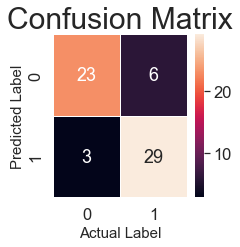

In [40]:
sns.set(font_scale = 1.5)
ax,fig = plt.subplots(figsize = (3,3))
ax = sns.heatmap(conf_mat,
                annot = True,
                linewidth = 0.5)
plt.xlabel("Actual Label",fontsize = 15)
plt.ylabel("Predicted Label",fontsize = 15)
plt.title("Confusion Matrix",fontsize = 30)

### Classification Report

In [41]:
print(f"Classification Report :\n {classification_report(y_test,y_preda)}")

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



### Cross validation

In [42]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [43]:
model = LogisticRegression(C = 0.23357214690901212,
                           solver = "liblinear")

In [44]:
model_accuracy = cross_val_score(model,
                                x,
                                y,
                                cv = 5,
                                scoring = "accuracy")
model_accuracy = np.mean(model_accuracy)
model_accuracy

0.8479781420765027

In [45]:
model_precision = cross_val_score(model,
                                x,
                                y,
                                cv = 5,
                                scoring = "precision")
model_precision = np.mean(model_precision)
model_precision

0.8215873015873015

In [46]:
model_recall = cross_val_score(model,
                              x,
                              y,
                              cv = 5,
                              scoring = "recall")
model_recall = np.mean(model_recall)
model_recall

0.9272727272727274

In [47]:
model_f1 = cross_val_score(model,
                          x,
                          y,
                          cv = 5,
                          scoring = "f1")
model_f1 = np.mean(model_f1)
model_f1

0.8705403543192143

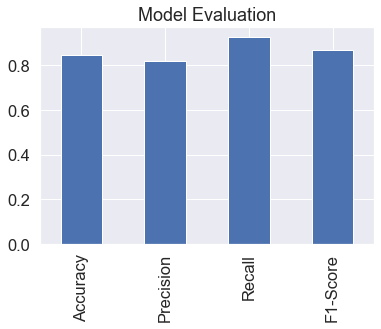

In [61]:
pd.DataFrame({"Accuracy":model_accuracy,
             "Precision":model_precision,
             "Recall":model_recall,
             "F1-Score":model_f1},
            index = [0]).T.plot(kind = "bar",title = "Model Evaluation",legend = False);

### Feature Importance

In [49]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [52]:
model = LogisticRegression(C= 0.615848211066026,solver = "liblinear")
model.fit(x_train,y_train);

In [53]:
model.coef_

array([[-1.17933920e-04, -1.01640843e+00,  6.25870100e-01,
        -1.78320870e-02, -8.28919459e-04,  1.34048614e-01,
         3.78443712e-01,  3.13185110e-02, -5.76452929e-01,
        -6.64162717e-01,  5.80291099e-01, -6.98392887e-01,
        -8.19067584e-01]])

In [56]:
feature_dict = dict(zip(df.columns,list(model.coef_[0])))
feature_dict

{'age': -0.00011793391989846357,
 'sex': -1.016408433460782,
 'cp': 0.6258701000344006,
 'trestbps': -0.0178320870018268,
 'chol': -0.0008289194587935641,
 'fbs': 0.13404861394539136,
 'restecg': 0.3784437122956577,
 'thalach': 0.03131851099606433,
 'exang': -0.5764529287356802,
 'oldpeak': -0.6641627166209682,
 'slope': 0.5802910987324591,
 'ca': -0.6983928873891583,
 'thal': -0.8190675838716965}

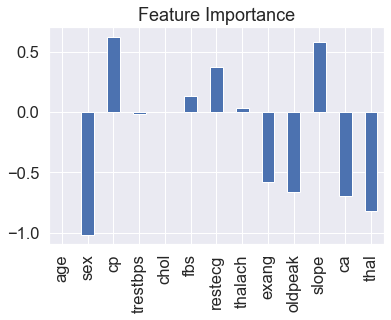

In [60]:
model_df = pd.DataFrame(feature_dict,index = [0])
model_df.T.plot.bar(title = "Feature Importance",legend = False);